In [53]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Importing Data
df = pd.read_excel(r"C:\Users\CHANDU\Desktop\VOIS_Works\DIY_Proj\Airbnb_Open_Data.xlsx")

In [55]:
#Display the first 5 rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## CHECKING DATATYPES

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

### OBSERVATIONS
- There are many columns with missing values

## DATA CLEANING

In [57]:
# Shape of the Data
df.shape

(102599, 26)

In [58]:
# To find the number of duplicates
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

### OBSERVATIONS
- Dataframe has 541 duplicate rows

In [59]:
# Changing the name "brookln" to "Brooklyn"
df.loc[(df["neighbourhood group"]=="brookln"),["neighbourhood group"]] = "Brooklyn"

In [60]:
# Drop Duplicate Records
df.drop_duplicates(inplace=True)

In [61]:
#Shape of the dataframe after dropping duplicates
df.shape

(102058, 26)

In [62]:
#Drop house_rules and license columns
df.drop(["house_rules","license"],axis=1,inplace=True)

In [63]:
#Rename price and service fee to price_$ and service_fee_$
df.rename(columns={"price":"price_$","service fee":"service_fee_$"},inplace=True)

In [64]:
#Drop all records with missing values
df.dropna(inplace=True)

In [65]:
#Changing the Datatypes using .astype
df["id"] = df["id"].astype(str)
df["host id"] = df["host id"].astype(str)
df["Construction year"] = df["Construction year"].astype(int)
df["price_$"] = df["price_$"].astype(float)
df["calculated host listings count"] = df["calculated host listings count"].astype(int)

In [66]:
#Drop the outliers in availability_365 with value greater than 500
df.drop(df[df["availability 365"]>500].index,inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

## EXPLORATORY DATA ANALYSIS (EDA)

## FIVE POINT SUMMARY

In [68]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
lat,83389.0,40.727349,40.50456,40.68764,40.72132,40.7626,40.91697,0.056326
long,83389.0,-73.948502,-74.24984,-73.98211,-73.95371,-73.9308,-73.70522,0.050342
instant_bookable,83389.0,0.497704,0.0,0.0,0.0,1.0,1.0,0.499998
Construction year,83389.0,2012.48781,2003.0,2007.0,2012.0,2017.0,2022.0,5.760526
price_$,83389.0,626.209668,50.0,340.0,625.0,914.0,1200.0,331.803443
service_fee_$,83389.0,125.243114,10.0,68.0,125.0,183.0,240.0,66.364212
minimum nights,83389.0,7.406109,-365.0,2.0,3.0,5.0,5645.0,28.105563
number of reviews,83389.0,32.261305,1.0,3.0,11.0,38.0,1024.0,51.95429
last review,83389,2019-06-08 21:32:53.396971008,2012-07-11 00:00:00,2018-10-25 00:00:00,2019-06-13 00:00:00,2019-07-05 00:00:00,2022-05-21 00:00:00,NaN
reviews per month,83389.0,1.377352,0.01,0.22,0.74,2.01,90.0,1.751091


In [69]:
# Property_types with their counts
property_types = df["room type"].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


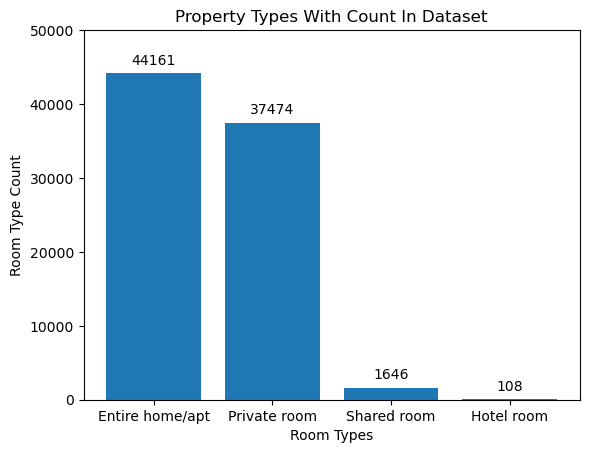

In [70]:
# Bar Graph Property_types with their counts
room_type_bar = plt.bar(property_types.index,property_types.loc[:,"count"])
plt.bar_label(room_type_bar,property_types.loc[:,"count"],padding=4)
plt.ylim(0,50000)
plt.xlabel("Room Types")
plt.ylabel("Room Type Count")
plt.title("Property Types With Count In Dataset")
plt.show()

In [71]:
#Neighbourhood Groups with number of listings
hood_group = df["neighbourhood group"].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


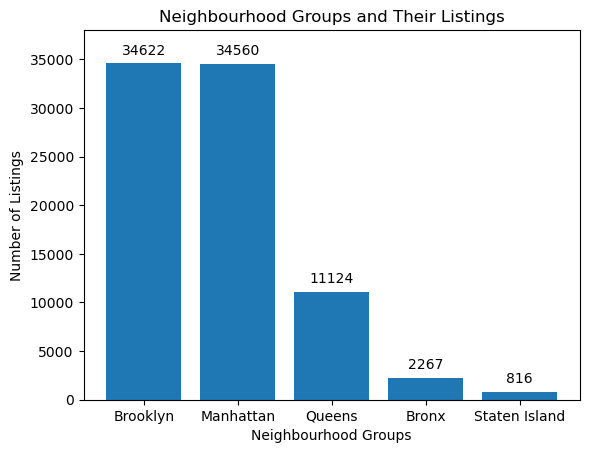

In [72]:
#Bar Graph of Neighbourhood Groups with number of listings
hood_group_bar = plt.bar(hood_group.index,hood_group.loc[:,"count"])
plt.bar_label(hood_group_bar,hood_group.loc[:,"count"],padding=4)
plt.ylim(0,38000)
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Number of Listings")
plt.title("Neighbourhood Groups and Their Listings")
plt.show()

In [73]:
#Average Price In AirBNB listings for each Neighbourhood group
avg_price = df.groupby("neighbourhood group")["price_$"].mean().round(2).sort_values(ascending=False).to_frame()
avg_price

,price_$
neighbourhood group,
Queens,630.50
Bronx,630.20
Brooklyn,627.43
Manhattan,623.44
Staten Island,622.13


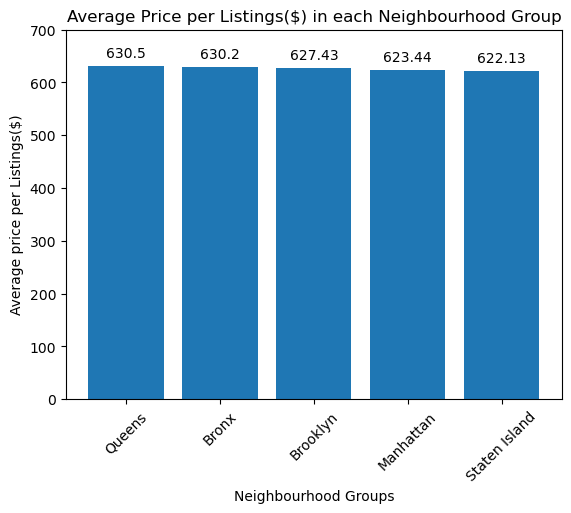

In [74]:
#Bar Graph of Neighbourhood Groups With Average Price Listings
avg_price_bar = plt.bar(avg_price.index,avg_price.loc[:,"price_$"])
plt.bar_label(avg_price_bar,avg_price.loc[:,"price_$"],padding=4)
plt.ylim(0,700)
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Average price per Listings($)")
plt.xticks(rotation=45)
plt.title("Average Price per Listings($) in each Neighbourhood Group")
plt.show()

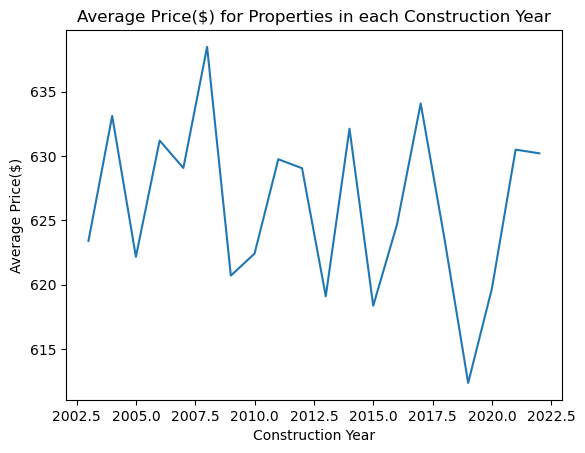

In [75]:
# Relationship Between Construction_Year of Property and Price with Plot
Const_grp = df.groupby(df["Construction year"])["price_$"].mean().to_frame()
Const_plot = plt.plot(Const_grp.index,Const_grp.loc[:,"price_$"])
plt.xlabel("Construction Year")
plt.ylabel("Average Price($)")
plt.title("Average Price($) for Properties in each Construction Year")
plt.show()

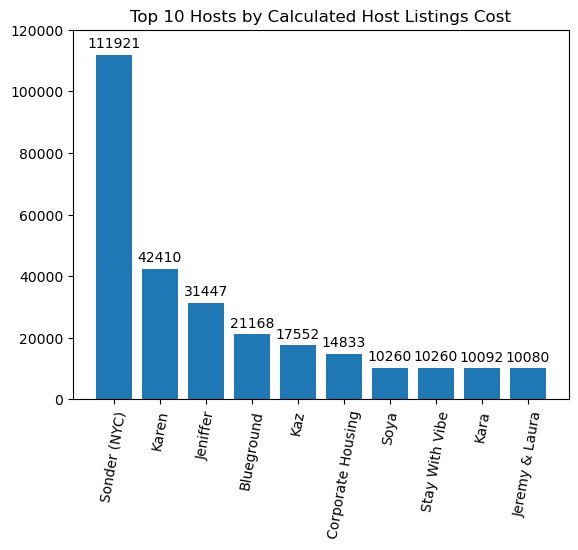

In [76]:
#Top 10 hosts by calculated host listing count
hosts = df.groupby("host name")["calculated host listings count"].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index,hosts.loc[:,'calculated host listings count'])
plt.bar_label(hosts_bar,hosts.loc[:,"calculated host listings count"],padding=3)
plt.xticks(rotation=80)
plt.ylim(0,120000)
plt.title("Top 10 Hosts by Calculated Host Listings Cost")
plt.show()

In [77]:
#Host Verification with avg positive reviews
review = df.groupby("host_identity_verified")["review rate number"].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


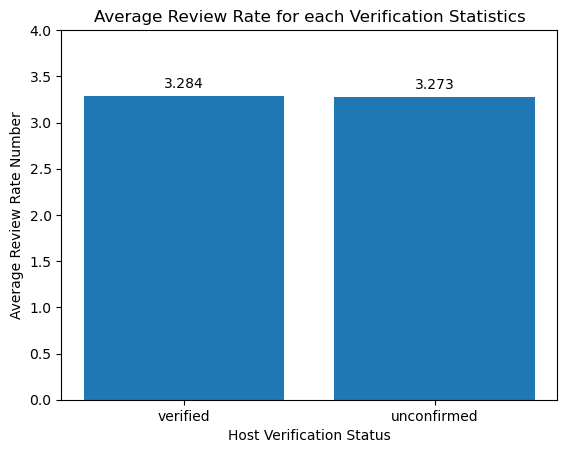

In [78]:
#Bar Graph of Host Verification with avg positive reviews
review_bar = plt.bar(review.index,review.loc[:,"review rate number"])
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],3),padding=4)
plt.ylim(0,4)
plt.xlabel("Host Verification Status")
plt.ylabel("Average Review Rate Number")
plt.title("Average Review Rate for each Verification Statistics")
plt.show()

In [79]:
#Connection Between Price of listing and Service Fee
df["price_$"].corr(df["service_fee_$"])

np.float64(0.9999909082976476)

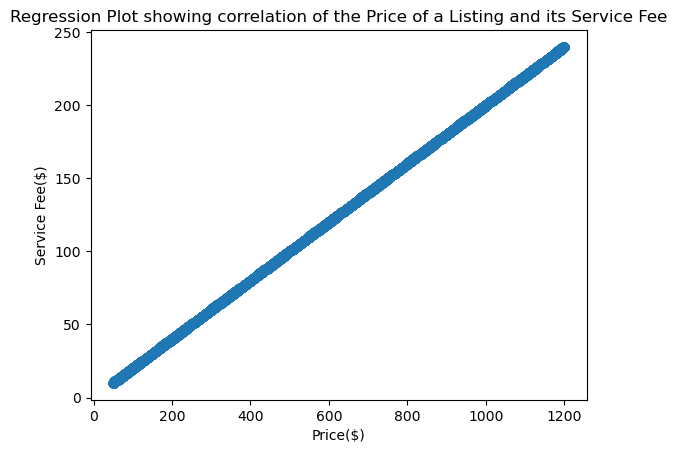

In [80]:
#Regplot Correlation
sns.regplot(df,x = "price_$",y="service_fee_$")
plt.xlabel("Price($)")
plt.ylabel("Service Fee($)")
plt.title("Regression Plot showing correlation of the Price of a Listing and its Service Fee")
plt.show()

In [81]:
#Average Review rate based on neighbourhood group and room type
Avg_Rv_Num = df.groupby(["neighbourhood group","room type"])["review rate number"].mean().to_frame()
Avg_Rv_Num

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Average Review Rate for each Property Group in each neighbourhood group')

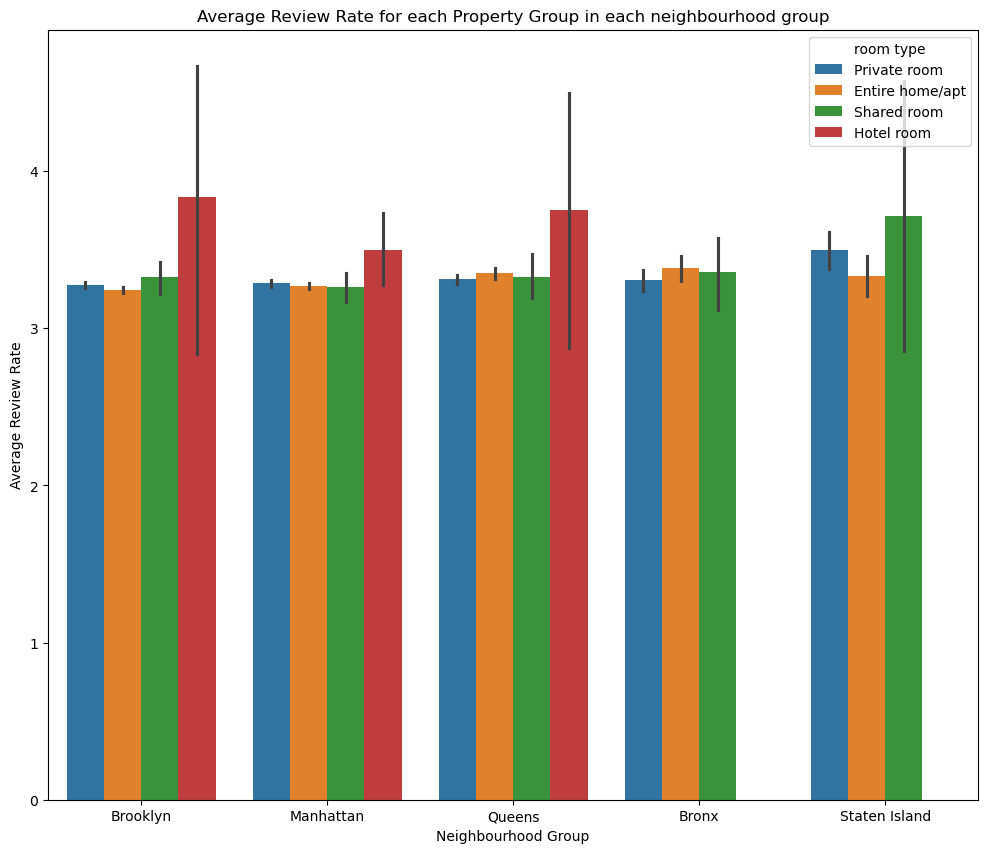

In [82]:
#Clustered bar Graph of Average Review Rate for each Property Group by Room type
plt.figure(figsize=[12,10])
sns.barplot(data=df,x = "neighbourhood group",y = "review rate number",hue = "room type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Review Rate")
plt.title("Average Review Rate for each Property Group in each neighbourhood group")

Text(0.5, 1.0, 'Regression Plot Between Calculated Host listings and Availability 365')

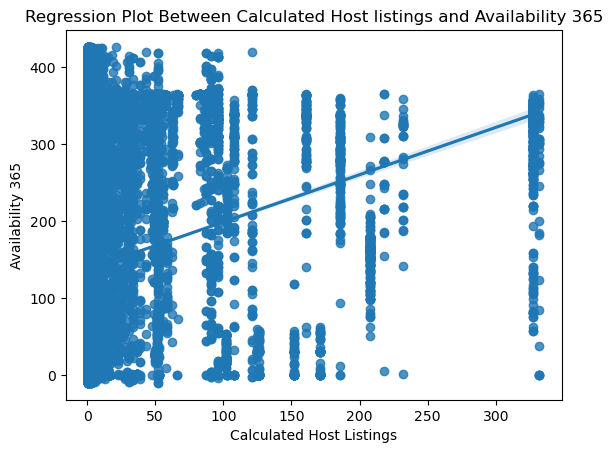

In [83]:
#Regplot for Calculating the availability 365 of the host listings
sns.regplot(data=df,x="calculated host listings count",y="availability 365")
plt.xlabel("Calculated Host Listings")
plt.ylabel("Availability 365")
plt.title("Regression Plot Between Calculated Host listings and Availability 365")

In [84]:
#Correlation value between calculated host listings count and availability 365
df["calculated host listings count"].corr(df["availability 365"])

np.float64(0.1359971471570338)

### OBSERAVTIONS
- The above factors have a **POSITIVE** correlation